In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Cs\MLT\Datasource\Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.drop(['ID'],inplace=True,axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [5]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

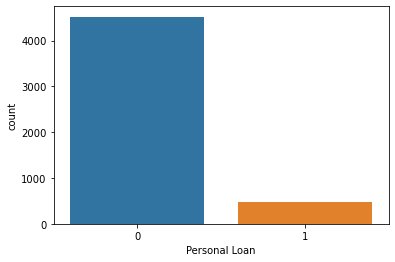

In [6]:
sns.countplot(x='Personal Loan',data=df)

In [7]:
df['Age'] = pd.cut(df['Age'],bins=[23,30,45,67],labels=['Young','Adult','Old'])

In [8]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,Young,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,Adult,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,Adult,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,Adult,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,Adult,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df['Age'].value_counts()

Old      2481
Adult    1895
Young     612
Name: Age, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

In [11]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 
       'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df[col]

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

keras = Sequential()
keras.add(Dense(12,input_dim=12,activation='relu'))
keras.add(Dense(8,activation='relu'))
keras.add(Dense(6,activation='relu'))

In [16]:
keras.add(Dense(1,activation='sigmoid'))

In [17]:
keras.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
keras.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
150/150 [==============================] - 2s 2ms/step - loss: 68.6821 - accuracy: 0.8293
Epoch 2/20
150/150 [==============================] - 0s 2ms/step - loss: 20.6839 - accuracy: 0.8245
Epoch 3/20
150/150 [==============================] - 0s 2ms/step - loss: 19.3988 - accuracy: 0.8312
Epoch 4/20
150/150 [==============================] - 0s 1ms/step - loss: 18.7926 - accuracy: 0.8397
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 16.7807 - accuracy: 0.8525
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 28.9196 - accuracy: 0.8331
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 15.5476 - accuracy: 0.8456
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 11.0467 - accuracy: 0.8571
Epoch 9/20
150/150 [==============================] - 0s 2ms/step - loss: 6.1269 - accuracy: 0.8763
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 11.3554 - accurac

In [19]:
_,acc = keras.evaluate(x_train,y_train)
print(acc*100)

118/118 [==============================] - 0s 1ms/step - loss: 89.6164 - accuracy: 0.0963
9.626666456460953


In [20]:
y_pred = keras.predict(x_test)
y_pred = (y_pred>0.5)

40/40 [==============================] - 0s 1ms/step


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.0952

In [22]:
from keras import backend as K
def r_loss(y_test,y_pred):
    res=K.sum(K.square(y_test-y_pred))    
    total=K.sum(K.square(y_test-K.mean(y_test)))
    return 1-(1-res/(total+K.epsilon()))

## Particle Swarm Optimisation

In [27]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [47]:
X.shape

(5000, 12)

In [48]:
df.shape

(5000, 13)

In [49]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [50]:
def cost_function(X, y, W):
    y_hat = sigmoid(np.dot(X, W))
    cost = -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return cost

In [51]:
def pso(X, y, n_particles, n_iterations):
    n_features = 12
    lb = -1
    ub = 1
    swarm_size = (n_particles, n_features)
    V = np.random.uniform(low=-1, high=1, size=swarm_size)
    X = np.random.uniform(low=lb, high=ub, size=swarm_size)
    P_best = X.copy()
    P_best_fitness = np.zeros(n_particles)
    for i in range(n_particles):
        P_best_fitness[i] = cost_function(X[i], y, X[i])
    G_best = X[np.argmin(P_best_fitness)].copy()
    G_best_fitness = np.min(P_best_fitness)
    for iteration in range(n_iterations):
        w = 0.5
        c1 = 0.8
        c2 = 0.9
        r1 = np.random.uniform(size=swarm_size)
        r2 = np.random.uniform(size=swarm_size)
        V = w*V + c1*r1*(P_best - X) + c2*r2*(G_best - X)
        X = X + V
        X[X < lb] = lb
        X[X > ub] = ub
        for i in range(n_particles):
            fitness = cost_function(X[i], y, X[i])
            if fitness < P_best_fitness[i]:
                P_best[i] = X[i].copy()
                P_best_fitness[i] = fitness
        if np.min(P_best_fitness) < G_best_fitness:
            G_best = X[np.argmin(P_best_fitness)].copy()
            G_best_fitness = np.min(P_best_fitness)
    return G_best

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0))/np.std(X_train, axis=0)

In [53]:
n_input = 12
n_hidden = 2
n_output = 1

In [54]:
W1 = pso(X_train, y_train, n_particles=20, n_iterations=50)
W2 = pso(sigmoid(np.dot(X_train, W1)), y_train, n_particles=20, n_iterations=50)
W = [W1, W2]

In [55]:
X_train.shape,W[0],W[1]

((4000, 12),
 array([ 0.00962629,  0.11518522, -0.00636093,  0.02068032,  0.07170373,
        -0.03391683, -0.01698916, -0.03407875, -0.16283071,  0.06150837,
         0.04086366, -0.04650758]),
 array([ 0.00408904, -0.00480641, -0.00212348, -0.11378331,  0.00939568,
         0.00965159,  0.02713851, -0.02287891,  0.00839009, -0.01461902,
        -0.0017095 ,  0.01778349]))

In [56]:
W[0]=W[0].reshape(12,1)

In [57]:
W[1]=W[1].reshape(12,1)

In [58]:
y_pred = sigmoid(X_train)

In [59]:
y_pred[:4]

array([[0.24729109, 0.24298409, 0.69122923, 0.21324632, 0.23031344,
        0.74427953, 0.25953973, 0.36531917, 0.94748412, 0.43717244,
        0.22743823, 0.34387081],
       [0.24729109, 0.35144422, 0.46793384, 0.36628912, 0.6317787 ,
        0.52411117, 0.25953973, 0.36531917, 0.94748412, 0.43717244,
        0.6937634 , 0.34387081],
       [0.24729109, 0.24298409, 0.89595081, 0.27686039, 0.23031344,
        0.91100523, 0.25953973, 0.36531917, 0.41442592, 0.43717244,
        0.6937634 , 0.34387081],
       [0.59254796, 0.60699199, 0.22884372, 0.49377613, 0.23031344,
        0.2941542 , 0.79154758, 0.36531917, 0.41442592, 0.43717244,
        0.6937634 , 0.34387081]])

In [60]:
y_test[:4]

array([0, 1, 0, 0], dtype=int64)